# Small Business Administration Loan Approval

## Model Optimization

### Bagja Satiaraharja

**Dataset:** SBA Loan Dataset | **Source:** [Kaggle](https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied)

The dataset is from the U.S. Small Business Administration (SBA)

The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.

In this final project, I will build a Flask-based web app that can recommend whether the loan is approved or not based on the given term and loan condition. 

### Import Data & Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


%matplotlib inline

In [62]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Training Set Setup

The first step of Model Optimization is to set up the data itself. We will divide the data into two parts. The first part is data that we use to train our model. And the second one is used for evaluating the data. We can divide the data using the train test split.

In [2]:
data = pd.read_csv('SBA_Loan_Data.csv')
data.head()

,Unnamed: 0,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,...,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,Approve
0,0,84,2.0,60000,48000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,60,2.0,40000,32000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,180,1.0,287000,215250,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,5,120,1.0,517000,387750,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7,84,2.0,45000,36000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
target = data.Approve
data.drop(['Approve','Unnamed: 0'], axis=1, inplace=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.20, random_state=101)

In [5]:
X_train.head(3)

,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,NAICS_23,...,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92
58347,44,2.0,18700,9350,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426166,48,2.0,30000,27000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
312301,72,1.0,150000,127500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
X_test.head(3)

,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,NAICS_23,...,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92
164089,76,1.0,20000,10000,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
357382,84,1.0,30000,15000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311277,84,1.0,110000,99000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

Since we have a classification case for our project, we will use some classification algorithm for our model. In this project, we will use six classification models to determine whether a loan can be approved or not.

- Logistic Regression
- Decision Tree
- Random Forest
- Ada Boost
- Gradient Boost
- KNN Classifier


The steps that I'll take in finding a model with hyperparameters and the best score are:
1. Make a Hyperparameters Grid for each model.
2. Do hyperparameter tuning on each model. Some of the models are done by using RandomizedSearchCV to saving time since the two last models have a long fitting time using GridSearchCV.
3. After we have the best hyperparameter for each model, we will compare and evaluate the model using the confusion matrix and ROC-AUC score.
4. Verifying the chosen model with an oversampling method to determine the data will better or not using the oversampling.
5. Save the model using joblib library.

### 1. Logistic Regression

In [9]:
logreg = LogisticRegression()

In [10]:
# Best Grid HyperParameterTuning
logreg_grid = LogisticRegression()
logreg_grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
For The Sake of Safety

In [12]:
param_grid_logreg = {
    'max_iter': [100, 200, 300],
}
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1, param_grid={'max_iter': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [13]:
grid_search_logreg.best_params_

{'max_iter': 100}

In [14]:
logreg_grid = grid_search_logreg.best_estimator_

In [15]:
logreg_grid_pred = logreg_grid.predict(X_test)
logreg_grid_proba = logreg_grid.predict_proba(X_test)

In [16]:
logreg_grid_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [17]:
print(classification_report(y_test, logreg_grid_pred))

              precision    recall  f1-score   support

           0       0.67      0.02      0.03     19783
           1       0.79      1.00      0.88     72077

    accuracy                           0.79     91860
   macro avg       0.73      0.51      0.45     91860
weighted avg       0.76      0.79      0.70     91860



In [18]:
tnlogreg, fplogreg, fnlogreg, tplogreg = confusion_matrix(y_test, logreg_grid_pred).ravel()
print(confusion_matrix(y_test, logreg_grid_pred))

[[  301 19482]
 [  148 71929]]


### 2. Decision Tree

In [19]:
dtc = DecisionTreeClassifier()

In [69]:
# Best Decision Tree Hyperparameter Tuning
dtc_grid = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=20)
dtc_grid.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'min_samples_split': [2,5,10,20],
}
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'm

In [21]:
grid_search_dtc.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}

In [22]:
dtc_grid = grid_search_dtc.best_estimator_

In [21]:
dtc_grid_pred = dtc_grid.predict(X_test)
dtc_grid_proba = dtc_grid.predict_proba(X_test)

In [22]:
dtc_grid_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [23]:
print(classification_report(y_test, dtc_grid_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     19783
           1       0.96      0.96      0.96     72077

    accuracy                           0.93     91860
   macro avg       0.90      0.90      0.90     91860
weighted avg       0.93      0.93      0.93     91860



In [24]:
tndtc, fpdtc, fndtc, tpdtc = confusion_matrix(y_test, dtc_grid_pred).ravel()
print(confusion_matrix(y_test, dtc_grid_pred))

[[16602  3181]
 [ 3147 68930]]


### 3. Random Forest

In [25]:
rfc = RandomForestClassifier()

In [26]:
# Best Random Forest Hyperparameter Tuning
rfc_grid = RandomForestClassifier(bootstrap=True, criterion='gini',max_depth=20,min_samples_split=10, n_estimators=200)
rfc_grid.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
param_grid_rfc = {
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'min_samples_split': [2,5,10,20],
    'n_estimators': [100,200]
}
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [30]:
grid_search_rfc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 10,
 'n_estimators': 200}

In [31]:
rfc_grid = grid_search_rfc.best_estimator_

In [27]:
rfc_grid_pred = rfc_grid.predict(X_test)
rfc_grid_proba = rfc_grid.predict_proba(X_test)

In [28]:
print(classification_report(y_test, rfc_grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     19783
           1       0.95      0.95      0.95     72077

    accuracy                           0.92     91860
   macro avg       0.89      0.89      0.89     91860
weighted avg       0.92      0.92      0.92     91860



In [29]:
tnrfc, fprfc, fnrfc, tprfc = confusion_matrix(y_test, rfc_grid_pred).ravel()
print(confusion_matrix(y_test, rfc_grid_pred))

[[16227  3556]
 [ 3372 68705]]


### 4. Ada Boosting

In [30]:
abc = AdaBoostClassifier()

In [31]:
# Best Ada Boost Hyperparameter Tuning
abc_grid = AdaBoostClassifier(learning_rate=1.0, n_estimators=200)
abc_grid.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [37]:
param_grid_abc = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.5, 1.0, 2.0]
}
grid_search_abc = GridSearchCV(estimator=abc, param_grid=param_grid_abc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_abc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [38]:
grid_search_abc.best_params_

{'learning_rate': 1.0, 'n_estimators': 200}

In [39]:
abc_grid = grid_search_abc.best_estimator_

In [32]:
abc_grid_pred = abc_grid.predict(X_test)
abc_grid_proba = abc_grid.predict_proba(X_test)

In [33]:
print(classification_report(y_test, abc_grid_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     19783
           1       0.95      0.95      0.95     72077

    accuracy                           0.92     91860
   macro avg       0.88      0.88      0.88     91860
weighted avg       0.92      0.92      0.92     91860



In [34]:
tnabc, fpabc, fnabc, tpabc = confusion_matrix(y_test, abc_grid_pred).ravel()
print(confusion_matrix(y_test, abc_grid_pred))

[[15923  3860]
 [ 3446 68631]]


### 5. Gradient Boosting

In [35]:
gbc = GradientBoostingClassifier()

In [7]:
# Best Gradient Boost Hyperparameter Tuning
gbc_random = GradientBoostingClassifier(learning_rate=0.1,max_depth=10, min_samples_split=5 ,n_estimators=100)
gbc_random.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
param_random_gbc = {
    'learning_rate': [0.1,0.5],
    'max_depth' : [3, 10],
    'min_samples_split' : [2,5],
    'n_estimators' : [100,200]
}
random_search_gbc = RandomizedSearchCV(estimator=gbc, param_distributions=param_random_gbc, scoring='roc_auc', n_jobs=-1)
random_search_gbc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                

In [29]:
random_search_gbc.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_depth': 10,
 'learning_rate': 0.1}

In [30]:
gbc_random = random_search_gbc.best_estimator_

In [8]:
gbc_random_pred = gbc_random.predict(X_test)
gbc_random_proba = gbc_random.predict_proba(X_test)

In [38]:
print(classification_report(y_test, gbc_random_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     19783
           1       0.96      0.96      0.96     72077

    accuracy                           0.94     91860
   macro avg       0.91      0.90      0.91     91860
weighted avg       0.94      0.94      0.94     91860



In [9]:
print(classification_report(y_test, gbc_random_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     19783
           1       0.96      0.96      0.96     72077

    accuracy                           0.94     91860
   macro avg       0.91      0.90      0.91     91860
weighted avg       0.94      0.94      0.94     91860



In [39]:
tngbc, fpgbc, fngbc, tpgbc = confusion_matrix(y_test, gbc_random_pred).ravel()
print(confusion_matrix(y_test, gbc_random_pred))

[[16760  3023]
 [ 2808 69269]]


In [10]:
tngbc, fpgbc, fngbc, tpgbc = confusion_matrix(y_test, gbc_random_pred).ravel()
print(confusion_matrix(y_test, gbc_random_pred))

[[16743  3040]
 [ 2768 69309]]


### 6. K-Nearest Neighbors

In [40]:
knn = KNeighborsClassifier()

In [41]:
# Best K-Nearest Neighbors Hyperparameter Tuning
knn_random = KNeighborsClassifier(leaf_size=10, n_neighbors=7)
knn_random.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [37]:
param_random_knn = {
    'algorithm' : ['auto','ball_tree', 'kd_tree','brute']
    'n_neighbors' : [3,5,7],
    'leaf_size' : [10, 30] 
}
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_random_knn,cv=5, scoring='roc_auc', n_jobs=-1)
random_search_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 30],
                                        'n_neighbors': [3, 5, 7]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [38]:
random_search_knn.best_params_

{'n_neighbors': 7, 'leaf_size': 10, 'algorithm': 'auto'}

In [39]:
knn_random = random_search_knn.best_estimator_

In [42]:
knn_random_pred = knn_random.predict(X_test)
knn_random_proba = knn_random.predict_proba(X_test)

In [43]:
print(classification_report(y_test, knn_random_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79     19783
           1       0.93      0.97      0.95     72077

    accuracy                           0.91     91860
   macro avg       0.89      0.85      0.87     91860
weighted avg       0.91      0.91      0.91     91860



In [44]:
tnknn, fpknn, fnknn, tpknn = confusion_matrix(y_test, knn_random_pred).ravel()
print(confusion_matrix(y_test, knn_random_pred))

[[14412  5371]
 [ 2516 69561]]


## Evaluation

### 1. Logistic Regression Evaluation

In [45]:
logreg_prob = logreg_grid.predict_proba(X_test)
problogreg = logreg_prob[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, problogreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

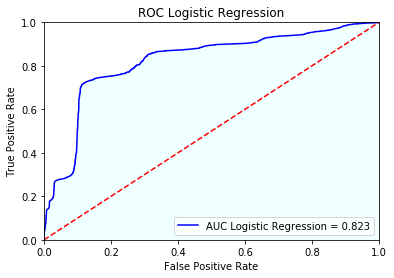

In [46]:
plt.title('ROC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_logreg,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg, tpr_logreg, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

### 2. Decision Tree Evaluation

In [47]:
dtc_prob = dtc_grid.predict_proba(X_test)
probdtc = dtc_prob[:,1]
fpr_dtc, tpr_dtc, threshold_dtc = roc_curve(y_test, probdtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

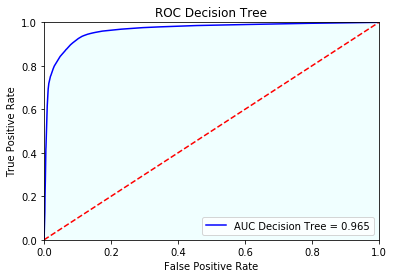

In [48]:
plt.title('ROC Decision Tree')
plt.plot(fpr_dtc, tpr_dtc, 'blue', label='AUC Decision Tree = {}'.format(round(roc_auc_dtc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

### 3. Random Forest Evaluation

In [49]:
rfc_prob = rfc_grid.predict_proba(X_test)
probrfc = rfc_prob[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, probrfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

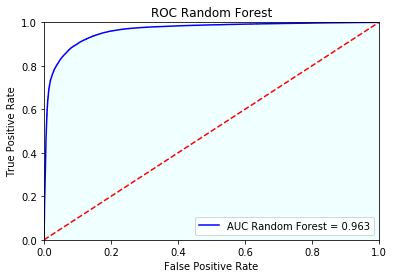

In [50]:
plt.title('ROC Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'blue', label='AUC Random Forest = {}'.format(round(roc_auc_rfc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc, tpr_rfc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

### 4. Ada Boost Evaluation

In [51]:
abc_prob = abc_grid.predict_proba(X_test)
probabc = abc_prob[:,1]
fpr_abc, tpr_abc, threshold_abc = roc_curve(y_test, probabc)
roc_auc_abc = auc(fpr_abc, tpr_abc)

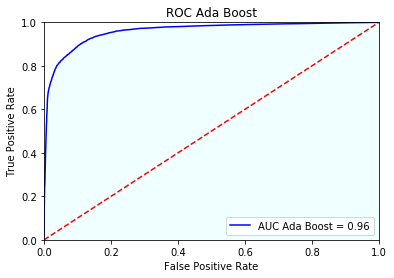

In [52]:
plt.title('ROC Ada Boost')
plt.plot(fpr_abc, tpr_abc, 'blue', label='AUC Ada Boost = {}'.format(round(roc_auc_abc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc, tpr_abc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

### 5. Gradient Boost Evaluation

In [53]:
gbc_prob = gbc_random.predict_proba(X_test)
probgbc = gbc_prob[:,1]
fpr_gbc, tpr_gbc, threshold_gbc = roc_curve(y_test, probgbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

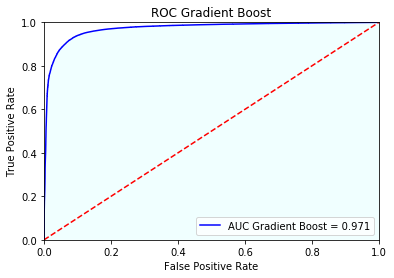

In [54]:
plt.title('ROC Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'blue', label='AUC Gradient Boost = {}'.format(round(roc_auc_gbc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

### 6. K-Nearest Neighbor Evaluation

In [55]:
knn_prob = knn_random.predict_proba(X_test)
probknn = knn_prob[:,1]
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, probknn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

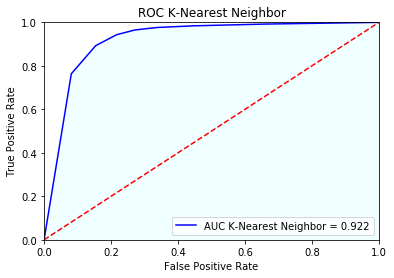

In [56]:
plt.title('ROC K-Nearest Neighbor')
plt.plot(fpr_knn, tpr_knn, 'blue', label='AUC K-Nearest Neighbor = {}'.format(round(roc_auc_knn,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_knn, tpr_knn, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

## Model Comparation

##### By accuracy_score, precision_score, recall_score, f1_score

In [57]:
modelComparation = pd.DataFrame({
    "Logistic Regression": [accuracy_score(y_test, logreg_grid_pred),precision_score(y_test, logreg_grid_pred),recall_score(y_test, logreg_grid_pred),f1_score(y_test, logreg_grid_pred), tplogreg, tnlogreg, fplogreg, fnlogreg],
    "Decision Tree": [accuracy_score(y_test, dtc_grid_pred),precision_score(y_test, dtc_grid_pred),recall_score(y_test, dtc_grid_pred),f1_score(y_test, dtc_grid_pred), tpdtc, tndtc, fpdtc, fndtc],
    "Random Forest": [accuracy_score(y_test, rfc_grid_pred),precision_score(y_test, rfc_grid_pred),recall_score(y_test, rfc_grid_pred),f1_score(y_test, rfc_grid_pred), tprfc, tnrfc, fprfc, fnrfc],
    "Ada Boost": [accuracy_score(y_test, abc_grid_pred),precision_score(y_test, abc_grid_pred),recall_score(y_test, abc_grid_pred),f1_score(y_test, abc_grid_pred), tpabc, tnabc, fpabc, fnabc],
    "Gradient Boost": [accuracy_score(y_test, gbc_random_pred),precision_score(y_test, gbc_random_pred),recall_score(y_test, gbc_random_pred),f1_score(y_test, gbc_random_pred), tpgbc, tngbc, fpgbc, fngbc],
    "K-Nearest Neighbor": [accuracy_score(y_test, knn_random_pred),precision_score(y_test, knn_random_pred),recall_score(y_test, knn_random_pred),f1_score(y_test, knn_random_pred), tpknn, tnknn, fpknn, fnknn],
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'True Positive', 'True Negative', 'False Positive', 'False Negative'])
modelComparation

,Logistic Regression,Decision Tree,Random Forest,Ada Boost,Gradient Boost,K-Nearest Neighbor
Accuracy Score,0.786305,0.931113,0.924581,0.920466,0.936523,0.914141
Precision Score,0.786875,0.955887,0.950789,0.946752,0.958183,0.928322
Recall Score,0.997947,0.956338,0.953217,0.952190,0.961042,0.965093
F1 Score,0.879930,0.956113,0.952002,0.949463,0.959610,0.946350
True Positive,71929.000000,68930.000000,68705.000000,68631.000000,69269.000000,69561.000000
True Negative,301.000000,16602.000000,16227.000000,15923.000000,16760.000000,14412.000000
False Positive,19482.000000,3181.000000,3556.000000,3860.000000,3023.000000,5371.000000
False Negative,148.000000,3147.000000,3372.000000,3446.000000,2808.000000,2516.000000


From this table, it can be concluded that the Gradient Boosting Classifier can provide the best results because it has the highest accuracy, precision, and F1 score. Also, this model has a low False Positive. This is important because the more False Positive the model has, the greater the loss for the institution. To validate the model, we'll be using the ROC and AUC scores to determine the sensitivity of the three models to the threshold.

##### By ROC_AUC_Score

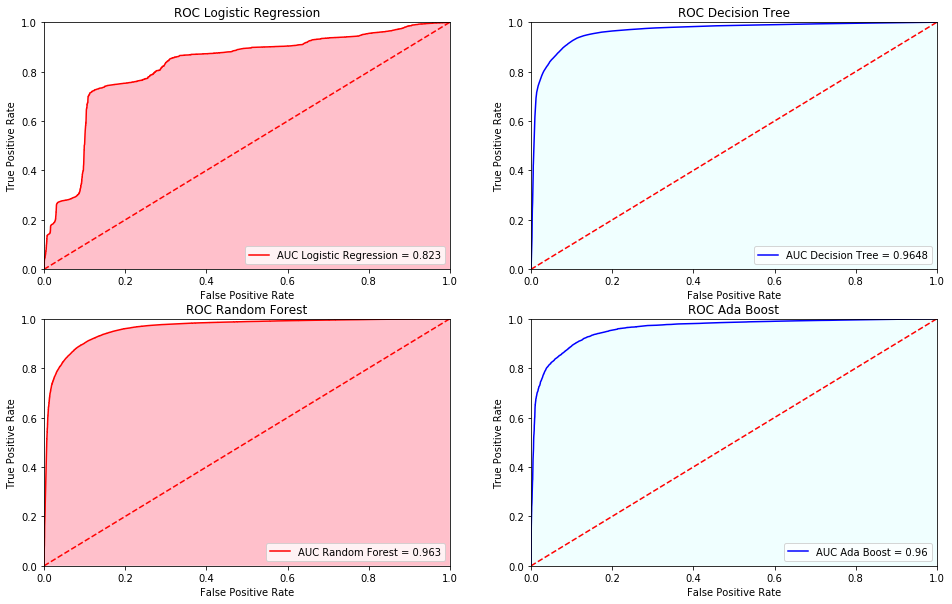

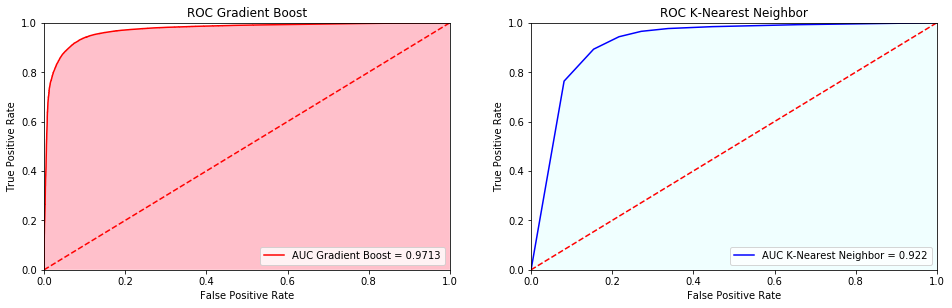

In [58]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('ROC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'red', label='AUC Logistic Regression = {}'.format(round(roc_auc_logreg,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg, tpr_logreg, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')

plt.subplot(222)
plt.title('ROC Decision Tree')
plt.plot(fpr_dtc, tpr_dtc, 'blue', label='AUC Decision Tree = {}'.format(round(roc_auc_dtc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

plt.subplot(223)
plt.title('ROC Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'red', label='AUC Random Forest = {}'.format(round(roc_auc_rfc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc, tpr_rfc, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')

plt.subplot(224)
plt.title('ROC Ada Boost')
plt.plot(fpr_abc, tpr_abc, 'blue', label='AUC Ada Boost = {}'.format(round(roc_auc_abc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc, tpr_abc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('ROC Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'red', label='AUC Gradient Boost = {}'.format(round(roc_auc_gbc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')

plt.subplot(222)
plt.title('ROC K-Nearest Neighbor')
plt.plot(fpr_knn, tpr_knn, 'blue', label='AUC K-Nearest Neighbor = {}'.format(round(roc_auc_knn,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_knn, tpr_knn, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

From all AUC graphs, it can be seen that the best model to use is the **Gradient Boos Classifier** model because it has the highest score with **0,971** points.

Because all the verification results show the **Gradient boost Clasifier** as the best model for our case. We will use this model for our Loan Approval Prediction Application.

In [ ]:
for the sake of safety

## Random Oversampling SMOTE

In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=1.0, k_neighbors=5)
Xsmot_train, ysmot_train = sm.fit_sample(X_train, y_train)

In [60]:
# Best Gradient Boost Hyperparameter Tuning
gbc_smot = GradientBoostingClassifier(learning_rate=0.1,max_depth=10, min_samples_split=5 ,n_estimators=100)
gbc_smot.fit(Xsmot_train, ysmot_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
param_random_gbc = {
    'learning_rate': [0.1,0.5],
    'max_depth' : [3, 10],
    'min_samples_split' : [2,5],
    'n_estimators' : [100,200]
}
random_gbc_smot = RandomizedSearchCV(estimator=gbc, param_distributions=param_random_gbc, scoring='roc_auc', n_jobs=-1)
random_gbc_smot.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                

In [29]:
random_gbc_smot.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_depth': 10,
 'learning_rate': 0.1}

In [30]:
gbc_smot = random_gbc_smot.best_estimator_

In [61]:
gbc_smot_pred = gbc_smot.predict(X_test)
gbc_smot_proba = gbc_smot.predict_proba(X_test)

In [62]:
print(classification_report(y_test, gbc_smot_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     19783
           1       0.96      0.95      0.96     72077

    accuracy                           0.93     91860
   macro avg       0.90      0.91      0.90     91860
weighted avg       0.94      0.93      0.94     91860



In [70]:
tngbcs, fpgbcs, fngbcs, tpgbcs = confusion_matrix(y_test, gbc_smot_pred).ravel()
print(confusion_matrix(y_test, gbc_smot_pred))

[[17075  2708]
 [ 3278 68799]]


##### By accuracy_score, precision_score, recall_score, f1_score

In [72]:
modelComparation = pd.DataFrame({
    "Gradient Boost": [accuracy_score(y_test, gbc_random_pred),precision_score(y_test, gbc_random_pred),recall_score(y_test, gbc_random_pred),f1_score(y_test, gbc_random_pred), tpgbc, tngbc, fpgbc, fngbc],
    "Gradient Boost with Smote": [accuracy_score(y_test, gbc_smot_pred),precision_score(y_test, gbc_smot_pred),recall_score(y_test, gbc_smot_pred),f1_score(y_test, gbc_smot_pred), tpgbcs, tngbcs, fpgbcs, fngbcs]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'True Positive', 'True Negative', 'False Positive', 'False Negative'])
modelComparation

,Gradient Boost,Gradient Boost with Smote
Accuracy Score,0.936806,0.934836
Precision Score,0.958287,0.962130
Recall Score,0.961305,0.954521
F1 Score,0.959794,0.958310
True Positive,69288.000000,68799.000000
True Negative,16767.000000,17075.000000
False Positive,3016.000000,2708.000000
False Negative,2789.000000,3278.000000


After we conduct oversampling smote for our model, we can see the result from the tables that the model without using the oversampling method still have the better result.

In [66]:
gbc_smot_prob = gbc_smot.predict_proba(X_test)
prob_gbc_smot = gbc_smot_prob[:,1]
fpr_gbcsmot, tpr_gbcsmot, threshold_gbcsmot = roc_curve(y_test, prob_gbc_smot)
roc_auc_gbcsmot = auc(fpr_gbcsmot, tpr_gbcsmot)

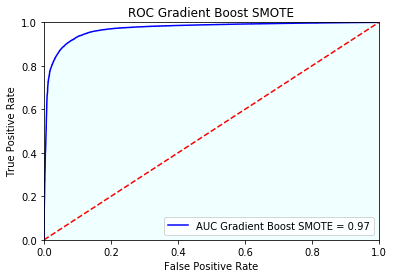

In [67]:
plt.title('ROC Gradient Boost SMOTE')
plt.plot(fpr_gbcsmot, tpr_gbcsmot, 'blue', label='AUC Gradient Boost SMOTE = {}'.format(round(roc_auc_gbcsmot,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbcsmot, tpr_gbcsmot, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

#### Model Comparation

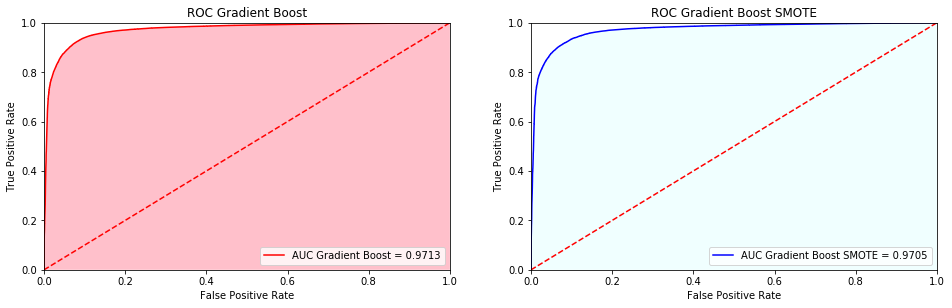

In [69]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('ROC Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'red', label='AUC Gradient Boost = {}'.format(round(roc_auc_gbc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')

plt.subplot(222)
plt.title('ROC Gradient Boost SMOTE')
plt.plot(fpr_gbcsmot, tpr_gbcsmot, 'blue', label='AUC Gradient Boost SMOTE = {}'.format(round(roc_auc_gbcsmot,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbcsmot, tpr_gbcsmot, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

From AUC graphs above, it can be seen that the best model to use is the **Gradient Boos Classifier model without oversampling** method because it has the highest score with **0,971** points. We will use this model for our Loan Approval Prediction Application.

## Joblib

After we done with machine learning modeling. The last step of this stage is to save the model using Joblib. So it can be used for a later stage.

In [1]:
import joblib

In [71]:
joblib.dump(gbc_random, 'gbc_SBA_Loan')

['gbc_SBA_Loan']